In [40]:
#Dependencies
%matplotlib notebook
import random
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets



In [2]:
#import data
mouse_file = Path("../week6/Mouse_metadata.csv")

mouse_data = pd.read_csv(mouse_file)
mouse_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#import data 

study_file = Path("../week6/Study_results.csv")

study_data = pd.read_csv(study_file)
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#merge data
merged_df = pd.merge(mouse_data, study_data, on = ["Mouse ID"])
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#number of unique mouse IDs
number_of_mice_ID = merged_df["Mouse ID"].nunique()
number_of_mice_ID
print (f"The number of unique Mouse ID is {number_of_mice_ID}")

The number of unique Mouse ID is 249


In [6]:
#find duplicated mice ID with timepoint
duplicated_data = merged_df.duplicated(["Mouse ID", "Timepoint"], keep = False)

duplicated_data

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [7]:
# show dupliated data
duplicate_data_ID = merged_df.loc[merged_df.duplicated(),:]
duplicate_data_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
#drop duplicate data from df

cleaned_data = merged_df[~duplicated_data]
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
#Display the updated number of unique mice IDs.

updated_number_of_mice_ID = cleaned_data["Mouse ID"].nunique()
updated_number_of_mice_ID
print (f'Updated number of unique mice ID is {updated_number_of_mice_ID}')

Updated number of unique mice ID is 249


In [10]:
cleaned_data.to_csv('Analysed Data/cleaned_dat.csv', index=False, header=True)

In [11]:
#summary statistics based on drug regimen and tumor volume
drug_regimen = cleaned_data.groupby("Drug Regimen")
drug_regimen.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [12]:
mean = drug_regimen["Tumor Volume (mm3)"].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.458254
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
median = drug_regimen["Tumor Volume (mm3)"].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
variance = drug_regimen["Tumor Volume (mm3)"].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     44.053659
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
std = drug_regimen["Tumor Volume (mm3)"].std()
std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.637293
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
sem = drug_regimen["Tumor Volume (mm3)"].sem()
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.540135
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [17]:
#statistical summary 
summary_statistics = pd.DataFrame({"Mean":mean, 
                                 "Median": median,
                                 "Variance": variance,
                                 "Standard Deviantion":std, 
                                   "SEM": sem})
summary_statistics

,Mean,Median,Variance,Standard Deviantion,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
#save data
summary_statistics.to_csv('Analysed data/Summary statistics.csv')

In [19]:
# number of mice in each drug group

no_of_mice = drug_regimen["Mouse ID"].count()
no_of_mice

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


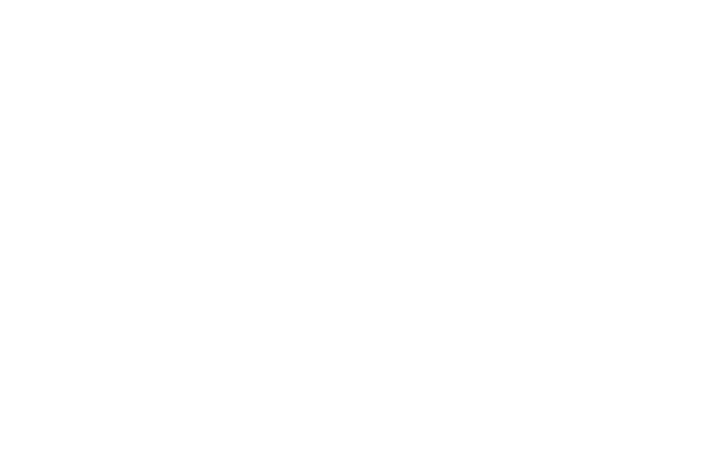

In [20]:
#bar chart with panda
panda_plot = no_of_mice.plot(kind ='bar', figsize = (8,5), rot=45, width = 0.8) 


panda_plot.set_title(label = "Number of Mice per Drug Regimen")
panda_plot.set_xlabel("Drug Regimen")
panda_plot.set_ylabel("Total number of Mice")


plt.grid()
plt.tight_layout()

plt.savefig("images/Panda's bar chart.png")
plt.show
plt.close()



<IPython.core.display.Javascript object>


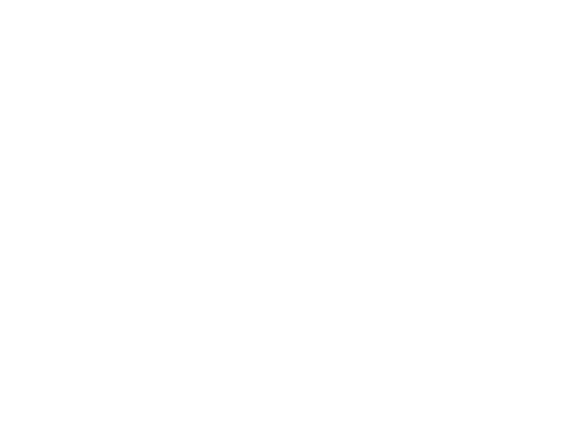

In [21]:
#bar chart with Matplotlib's

x_axis = np.arange(len(no_of_mice))
drug_names = list(no_of_mice.index.values)

#create graph
plt.bar(x_axis, no_of_mice, color = "r")


plt.grid()

plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of Mice")

plt.xticks(x_axis, drug_names, rotation=45)

plt.tight_layout()

plt.savefig("images/Matplotlib's bar chart.png")
plt.show
plt.close()


In [22]:
# count gender
mice_gender = cleaned_data.groupby('Sex')["Sex"].count()
mice_gender


Sex
Female    925
Male      958
Name: Sex, dtype: int64

<IPython.core.display.Javascript object>


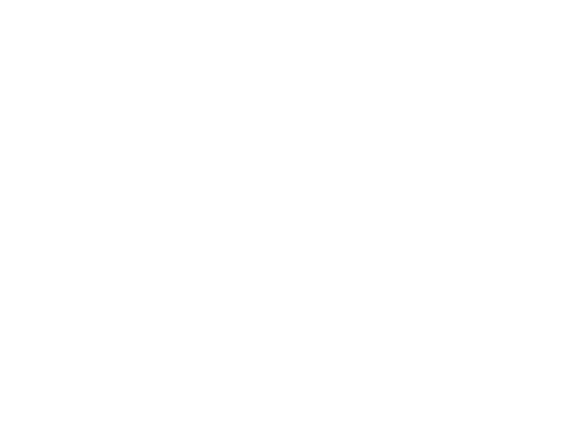

In [23]:
# pandas pie chart 
mice_gender.plot(kind='pie', autopct='%1.1f%%', startangle=140, title ="Distribution of female versus male mice in the study", label = "Sex" )

plt.axis("equal")
plt.show()

plt.savefig("images/Panda's pie chart.png")

plt.close()

In [24]:
mice_gender.index

Index(['Female', 'Male'], dtype='object', name='Sex')

<IPython.core.display.Javascript object>


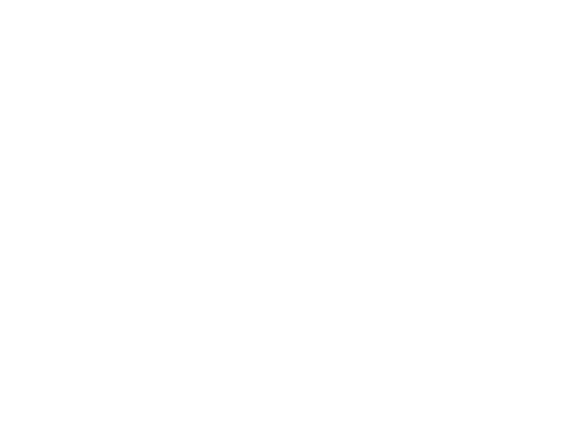

In [25]:
### Matplotlib's pie chart


plt.pie(mice_gender, labels = mice_gender.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of female versus male mice in the study")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

plt.savefig("images/Matplotlib's pie chart.png")
plt.close()

In [26]:
#isolate 4 drugs of interest
selected_drugs_data = cleaned_data[cleaned_data['Drug Regimen'].isin(['Capomulin',
                                                                              'Ramicane', 'Infubinol', 'Ceftamin'])]
selected_drugs_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [27]:
#looping through new data
drug_data = {}
for drug in selected_drugs_data['Drug Regimen'].unique():
    drug_data[drug] = selected_drugs_data[selected_drugs_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']

In [28]:
# List of drug names
drug_names = list(drug_data.keys())

# data to be plotted
data_to_plot = [drug_data[drug] for drug in drug_names]




In [29]:
# Find outliers
treatment_names = ["Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin"]
treatment_names

["Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin"]

<IPython.core.display.Javascript object>


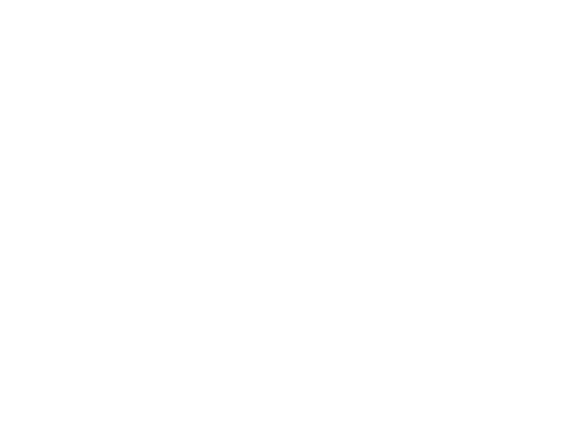

In [30]:
# Create the box plot
plt.boxplot(data_to_plot, labels=drug_names)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Final Tumor Volume Distribution for Selected Drugs')
plt.show()
plt.savefig("images/Final Tumor Volume Distribution for Selected Drugs.png")
plt.close()


In [31]:
#line plot of tumor volume vs. time point for one mouse treated with Capomulin
#isolate Capomlin
capomulin_df = selected_drugs_data[selected_drugs_data["Drug Regimen"] == "Capomulin"]

capomulin_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [32]:
#choose one mouse

chosen_mouse = capomulin_df[capomulin_df ["Mouse ID"] == "s185"]
chosen_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


<IPython.core.display.Javascript object>


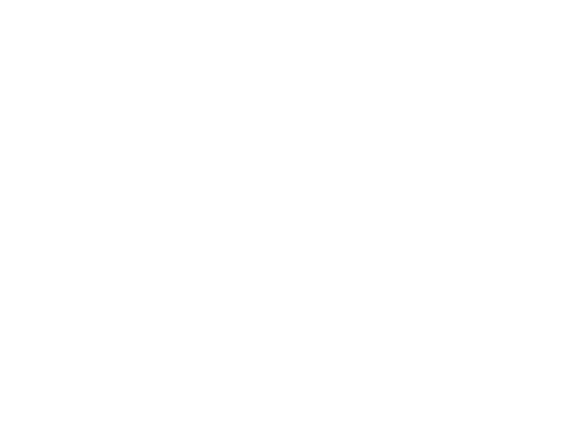

In [33]:
#generate the line plot
#identify variables: x and y 
line_plot = plt.plot(chosen_mouse["Timepoint"], chosen_mouse["Tumor Volume (mm3)"])


# Set x/y label, title
plt.title("Tumor Volume vs. Timepoint for Mouse s185 treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.xlim(0,45)
plt.show()
plt.savefig("images/Line Plot of Tumor Volume vs. Timepoint for Mouse s185 treated with Capomulin.png")

plt.close()

In [34]:
#Scatter plot is generated that shows average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [35]:
# average tumor volume of each mice
mice_grouped = capomulin_df.groupby("Mouse ID")
mice_grouped

In [36]:
avg_weight = mice_grouped["Weight (g)"].mean()
avg_weight

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

In [37]:
avg_tumor = mice_grouped["Tumor Volume (mm3)"].mean()
avg_tumor

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

<IPython.core.display.Javascript object>


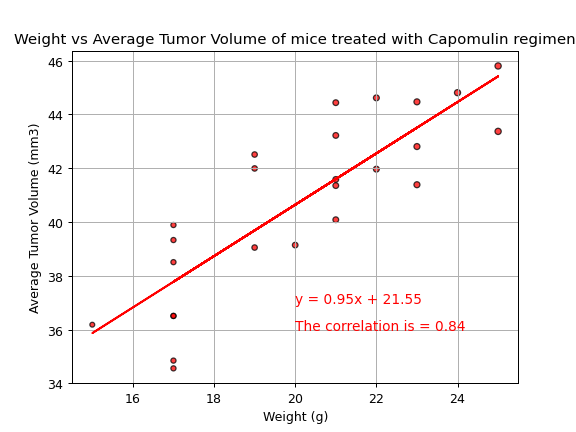

The correlation between both factors is 0.84


In [62]:
#generate scatter plot

plt.scatter(avg_weight, avg_tumor, marker="o", facecolors="red", edgecolors="black",
            s=avg_weight, alpha=0.75)

plt.title('Weight vs Average Tumor Volume of mice treated with Capomulin regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
correlation = st.pearsonr(avg_weight, avg_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_tumor)

regress_values = avg_weight * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(20,37), fontsize=11, color="red")

plt.annotate(f'The correlation is = {round(correlation[0],2)}', (20,36), fontsize=11, color="red")

plt.plot(avg_weight, regress_values,"r-")


plt.show()

plt.savefig("images/Weight vs Average Tumor Volume of mice treated with Capomulin regimen.png")
